# Исследование продаж компьютерных игр

## Выгрузка данных и изучение общей информации

### Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\HuaweiMatebook\jupyternotebooks\games.csv')

### Первичный осмотр данных

Выведем первые 10 строк датафрейма:

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Общая информация о датафрейме:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Выведем описание количественных данных датафрейма:

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


Выведем описание категориальных данных датафрейма:

In [6]:
df.describe(include='object').T

,count,unique,top,freq
Name,16713,11559,Need for Speed: Most Wanted,12
Platform,16715,31,PS2,2161
Genre,16713,12,Action,3369
User_Score,10014,96,tbd,2424
Rating,9949,8,E,3990


In [7]:
print(f'Количество пропусков в датафрейме: {df.isna().sum().sum()}')
print(f'Количество явных дубликатов в датафрейме: {df.duplicated().sum()}')

Количество пропусков в датафрейме: 22318
Количество явных дубликатов в датафрейме: 0


**Вывод:** Итак, в таблице 11 столбцов и 16715 строк. В каждой строке - информация о конкретной игре.

В данных есть пропущенные значения. Явные дубликаты отсутствуют. В некоторых столбцах  установлен не соответствующий значениям тип данных. Также необходимо привести названия столбцов к нижнему регистру.
Данные за 2016 год могут быть неполными.

## Предобработка данных

### Замена названия столбцов

In [8]:
# Приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [9]:
# Выведем названия столбцов после преобразования
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

In [10]:
# Сохраним начальное количество строк датафрейма
df_size = len(df)
df_size

16715

In [11]:
# Выведем количество пропусков по столбцам
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [12]:
# Выведем строки с отсутствующим названием игры
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В обеих строках практически отсутствует информация, поэтому эти строки можно удалить.

In [13]:
df = df.dropna(subset=['name', 'genre'])

**По оставшимся столбцам:**
- в столбце с годом выпуска игры будет некорректно присваивать какой-то конкретный год. Уберем пропуски.
- в столбцах `critic_score`, `user_score` пропуски нужно оставить, так как заполнение средним или медианным значениями может внести существенные искажения в дальнейший анализ.
- в столбце `rating` категориальные данные, поэтому заменим пропуски на "undefined" чтобы обозначить отсутствие информации о рейтинге.

In [14]:
# Удалим строки, в которых не указан год выпуска
df = df[df['year_of_release'].notna()]
# Заменим пропуски в рейтинге на 'undefined'
df['rating'].fillna('undefined', inplace=True)

In [15]:
# Проверим сколько процентов данных осталось относительно начального
print(f'После обработки пропусков у нас осталось {len(df) / df_size:.0%} данных.')

После обработки пропусков у нас осталось 98% данных.


Пропуски в данных могли возникнуть по разным причинам:
   - отсутствие информации по конкретным играм, например, для старых или непопулярных игр.
   - человеческий фактор: опечатки или неправильно внесенные данные.
   - в ходе сбора данных могли возникнуть технические проблемы, которые привели к потере информации или созданию пропусков.

### Преобразование типов данных столбцов

В столбцах `year_of_release`, `critic_score` стоит изменить тип данных с `float` на `int`, так как дробные значения в этом столбце не имеют смысла. Но так как в столбце `critic_score` всё еще присутствуют значения NaN, тип оставим как есть.

Столбец `user_score` нужно привести к числовому типу, а именно, к `float` из-за наличия дробной части. В этом столбце встречаются значения `tbd`. Такая аббревиатура используется, когда конкретное значение ещё не известно или не уточнено, но будет определено в будущем. Для приведения к типу `float` заменим эти значения на `NaN`.

In [16]:
# Заменяем значения 'tbd' на NaN в столбце с оценками пользователей
df['user_score'].replace('tbd', np.nan, inplace=True)

In [17]:
# Преобразовываем типы данных
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = df['user_score'].astype('float')

In [18]:
# Создадим новый столбец с суммарными продажами во всех регионах
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

### Обработка дубликатов

Выведем уникальные значения по каждому категориальному признаку:

In [19]:
for col in df.select_dtypes(include='object').columns:
    display(df[col].value_counts())

name
Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
Ratatouille                                9
FIFA 14                                    9
Terraria                                   8
                                          ..
Loving Life with Hello Kitty & Friends     1
Scrabble (Others sales)                    1
Viva Pinata: Party Animals                 1
Sands of Destruction                       1
Haitaka no Psychedelica                    1
Name: count, Length: 11426, dtype: int64

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

genre
Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: count, dtype: int64

rating
undefined    6676
E            3921
T            2905
M            1536
E10+         1393
EC              8
K-A             3
AO              1
RP              1
Name: count, dtype: int64

В столбце `name` встречаются повторяющиеся названия, потому что игра может выходить на разных платформах. С дубликатами проблем нет.

### Обработка выбросов

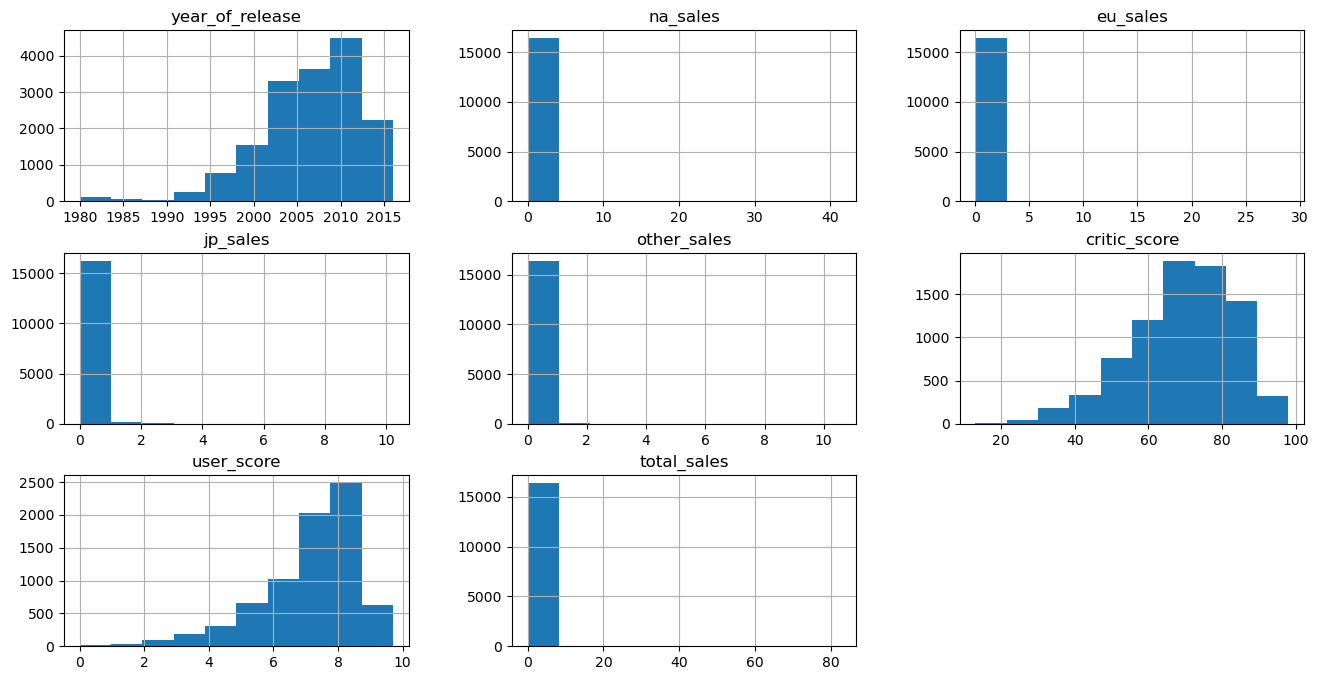

In [20]:
# Построим гистограммы для столбцов с числовыми данными
df.hist(figsize=(16,8))
plt.show()

В столбцах с продажами для каждого региона есть значения, которые сильно отличаются от большинства. Скорее всего это игровые хиты, которые имеют огромную популярность среди игроков.

## Исследовательский анализ данных

В этой части мы определим актуальный период для планирования на следующий год, выявим потенциально прибыльные платформы, рассмотрим влияние оценки критиков и пользователей на продажи и определим популярные игровые жанры.

### Сколько игр выпускалось в разные годы?

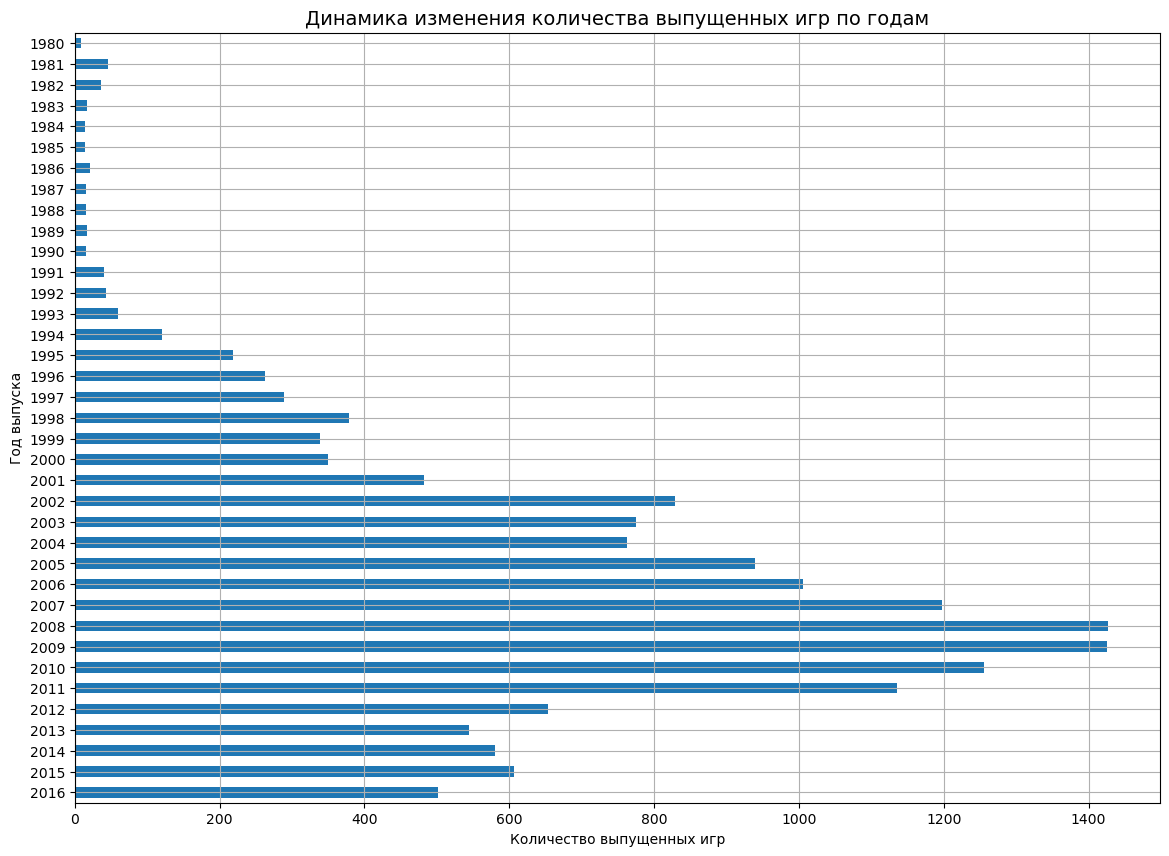

In [21]:
# Посчитаем количество выпускаемых игр по годам
sales_per_year = df['year_of_release'].value_counts().sort_index()
# Представим эту таблицу в виде графика
ax = sales_per_year.sort_index(ascending=False).plot(figsize=(14, 10), kind='barh', grid=True)
ax.set_xlabel('Количество выпущенных игр')
ax.set_ylabel('Год выпуска')
ax.set_title('Динамика изменения количества выпущенных игр по годам', fontsize=14)
plt.show()

Из графика видно, что в начале 1980-х годов рынок игр был относительно небольшим, количество выпущенных игр сильно выросло с начала 1990-х годов и достигло пика в конце 2000-х и начале 2010-х. После этого наблюдается небольшой спад, но количество выпущенных игр остается высоким.
Для планирования на 2017 год полезно иметь данные за несколько предыдущих лет. Это позволит учитывать тенденции изменений в игровой индустрии.

### Как менялись продажи по платформам ?

In [22]:
# Выведем топ-10 популярных платформ
(df.pivot_table(index='platform', values='total_sales', aggfunc='sum').
                sort_values(by='total_sales', ascending=False).head(10))

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Возьмем 4 самых популярных платформ и для них построим распределение продаж по годам.

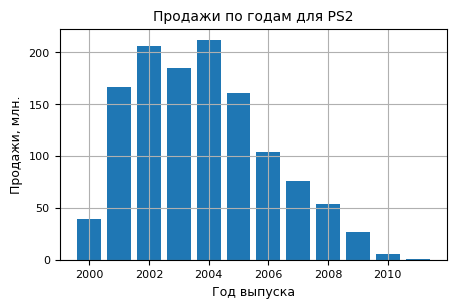

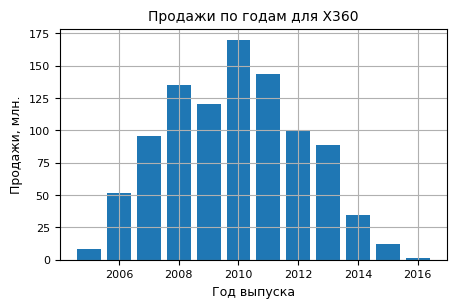

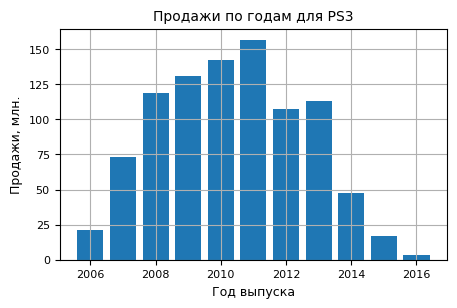

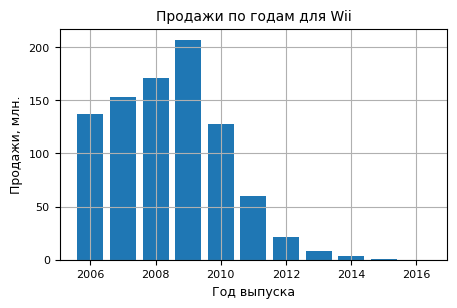

In [23]:
for platform in ['PS2', 'X360', 'PS3', 'Wii']:
    total_sales_by_year = df[df['platform'] == platform].pivot_table(index='year_of_release', 
                                                                     values='total_sales', aggfunc='sum')
    plt.figure(figsize=(5,3))
    plt.bar(total_sales_by_year.index, total_sales_by_year['total_sales'])
    plt.title(f'Продажи по годам для {platform}', fontsize=10)
    plt.xlabel('Год выпуска', fontsize=9)
    plt.ylabel('Продажи, млн.',fontsize=9)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(True)

В среднем срок жизни платформы - 8 лет.

Для планирования рекламной кампании на 2017 год данные за несколько последних лет будут наиболее информативными. С учетом полученных графиков достаточно учесть последние 4 года.

### Какие платформы лидируют по продажам?

In [24]:
# Оставим платформы, на которых игры выходили последние 4 года. Далее будем работать с переменной df_filtered.
df_filtered = df[df['year_of_release'] >= 2013]

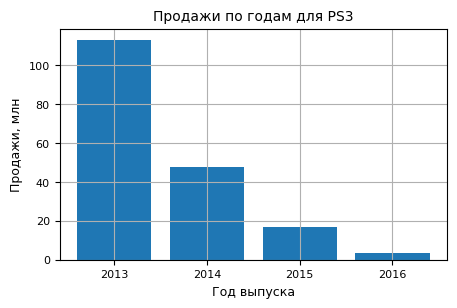

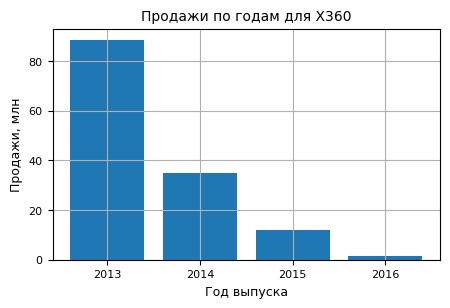

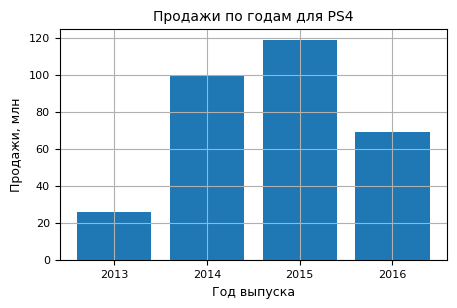

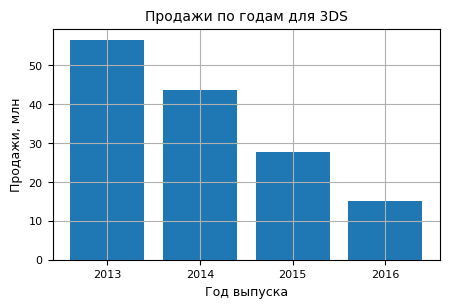

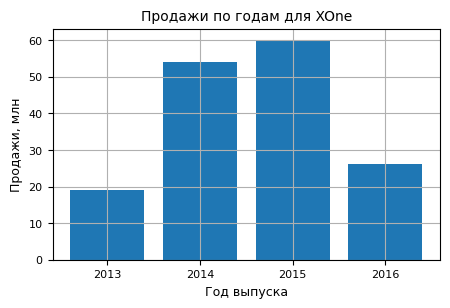

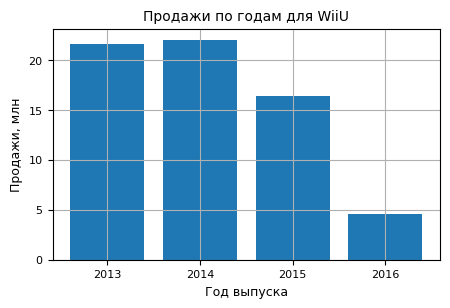

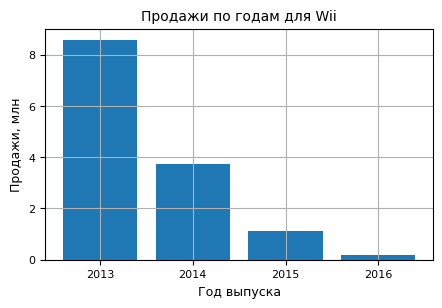

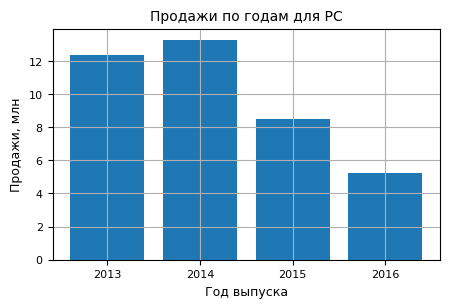

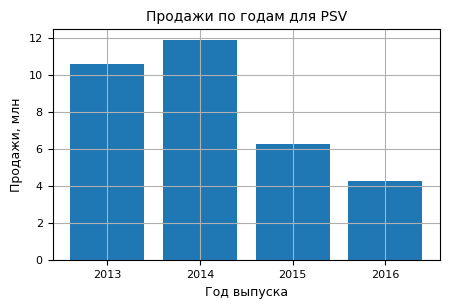

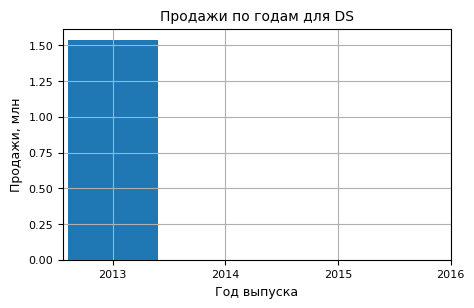

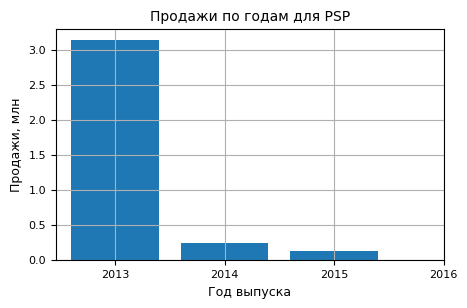

In [25]:
# Построим продажи за последние 4 года
for platform in df_filtered['platform'].unique():
    total_sales_by_year = df_filtered[df_filtered['platform'] == platform].pivot_table(index='year_of_release', 
                                                                                       values='total_sales', aggfunc='sum')
    plt.figure(figsize=(5,3))
    plt.bar(total_sales_by_year.index, total_sales_by_year['total_sales'])
    plt.title(f'Продажи по годам для {platform}', fontsize=10)
    plt.xlabel('Год выпуска', fontsize=9)
    plt.ylabel('Продажи, млн', fontsize=9)
    plt.xticks([2013,2014,2015,2016], fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(True)

Потенциально прибыльными платформами можно назвать `PS4`, `3DS`, `XOne`, `PC`, что вполне логично так как остальные платформы являются прошлыми поколениями, которые теряют свою актуальность и перестают поддерживаться. Учитывая, что данные за 2016 год могут быть не полными, продажи по некоторым платформам возможно растут.

In [26]:
top_platform = ['PS4', 'XOne', 'PC', '3DS']

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

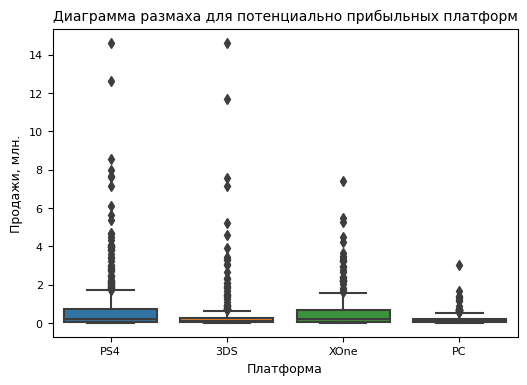

In [27]:
# Построим "ящик с усами" для 4-х потенциально прибыльных платформ
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_filtered[df_filtered['platform'].isin(top_platform)], x='platform', y='total_sales')
plt.xlabel('Платформа', fontsize=9)
plt.ylabel('Продажи, млн.', fontsize=9)
plt.title('Диаграмма размаха для потенциально прибыльных платформ', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

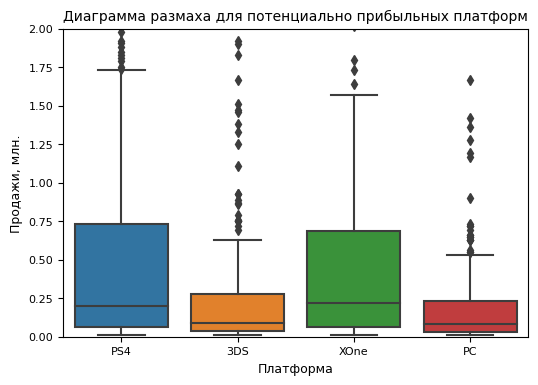

In [28]:
# Изменим масштаб
plt.figure(figsize=(6, 4))
plt.ylim(0, 2)
sns.boxplot(data=df_filtered[df_filtered['platform'].isin(top_platform)], x='platform', y='total_sales')
plt.xlabel('Платформа', fontsize=9)
plt.ylabel('Продажи, млн.', fontsize=9)
plt.title('Диаграмма размаха для потенциально прибыльных платформ', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

На диаграмме много значений за пределами "ящика с усами", но нельзя их назвать выбросами. На рынке видеоигр всегда есть несколько крупных игр, которые продаются в огромных количествах. Эти хиты могут создавать выбросы в данных, так как их продажи значительно превышают средние и медианные значения. К примеру, для `PS4` два самых выбиващихся значения - это игры `Call of Duty: Black Ops 3` и `Grand Theft Auto 5`, которые являются мировыми хитами.

In [29]:
# Рассмотрим медианные значения общих продаж для каждой платформы
for platform in top_platform:
    print(f'Медианное значение общих продаж игр на платформе {platform} составляет', 
          df_filtered[df_filtered['platform']==platform]['total_sales'].median(), 'млн. проданных копий')

Медианное значение общих продаж игр на платформе PS4 составляет 0.2 млн. проданных копий
Медианное значение общих продаж игр на платформе XOne составляет 0.22 млн. проданных копий
Медианное значение общих продаж игр на платформе PC составляет 0.08 млн. проданных копий
Медианное значение общих продаж игр на платформе 3DS составляет 0.09 млн. проданных копий


PS4 и XOne являются наиболее успешными платформами среди рассмотренных, и многие игры на этой платформе имеют хорошие продажи.

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

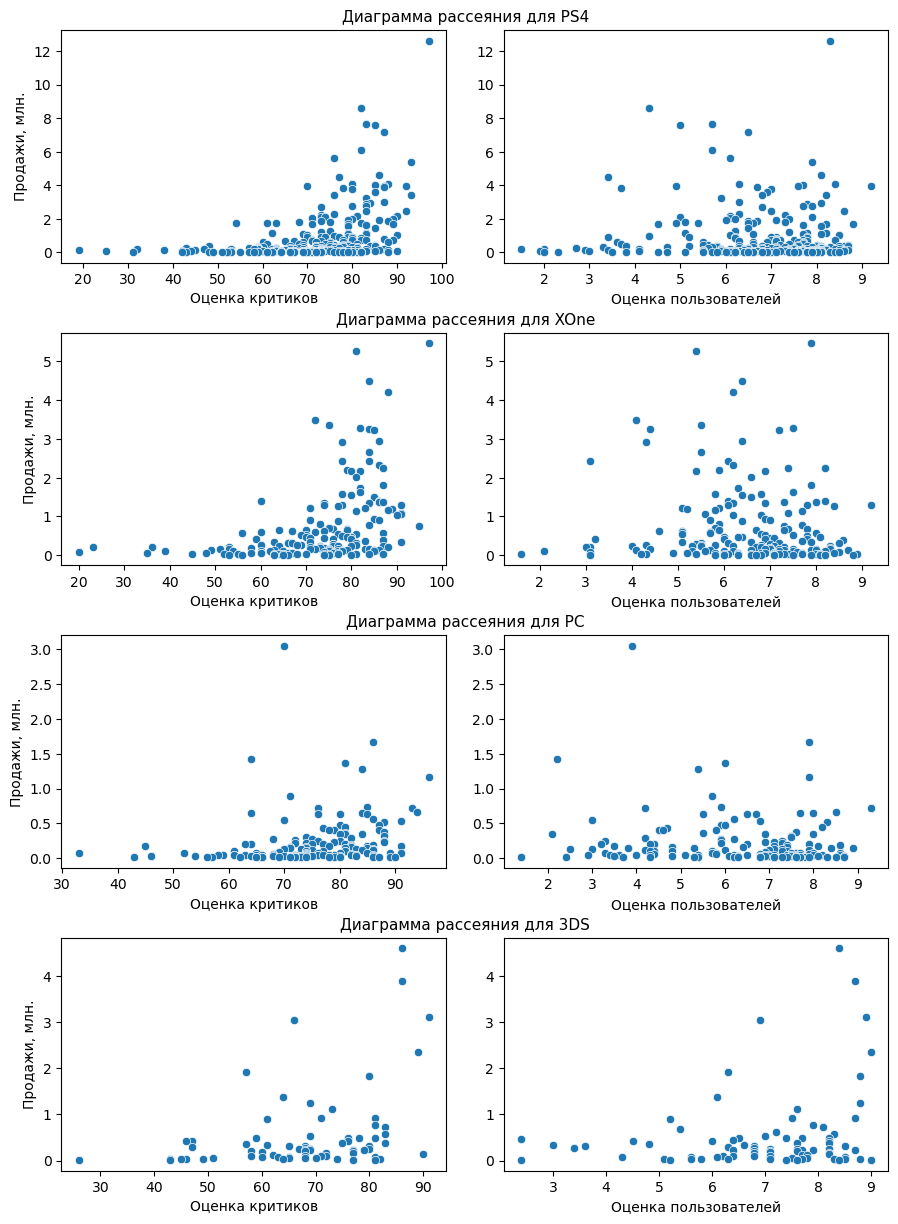

In [30]:
f, ax = plt.subplots(len(top_platform), 2, figsize=(9, 12))
f.tight_layout()
f.subplots_adjust(hspace=0.3)

for i, platform in enumerate(top_platform):
    # Построим сами диаграммы рассеяния
    sns.scatterplot(data=df_filtered[df_filtered['platform']==platform], x='critic_score', y='total_sales', ax=ax[i, 0])
    sns.scatterplot(data=df_filtered[df_filtered['platform']==platform], x='user_score', y='total_sales', ax=ax[i, 1])    
    
    # Установим подписи осей
    ax[i, 0].set_xlabel('Оценка критиков')
    ax[i, 1].set_xlabel('Оценка пользователей')
    ax[i, 0].set_ylabel('Продажи, млн.')
    ax[i, 1].set_ylabel('')
    
    # Установим подпись для графиков
    ax[i, 0].set_title(f'Диаграмма рассеяния для {platform}', fontsize=11, x=1.05)
plt.show()

**Посчитаем коэффициент корреляции между этими показателями для каждой платформы**

In [31]:
for platform in top_platform:
    print(f'Коэффициент корреляции для {platform}')
    print('- между продажами и оценкой критиков',
          round(df_filtered[df_filtered['platform']==platform]['total_sales'].
          corr(df_filtered[df_filtered['platform']==platform]['critic_score']), 2))
    print('- между продажами и оценкой пользователей',
          round(df_filtered[df_filtered['platform']==platform]['total_sales'].
          corr(df_filtered[df_filtered['platform']==platform]['user_score']), 2))
    print()

Коэффициент корреляции для PS4
- между продажами и оценкой критиков 0.41
- между продажами и оценкой пользователей -0.03

Коэффициент корреляции для XOne
- между продажами и оценкой критиков 0.42
- между продажами и оценкой пользователей -0.07

Коэффициент корреляции для PC
- между продажами и оценкой критиков 0.2
- между продажами и оценкой пользователей -0.09

Коэффициент корреляции для 3DS
- между продажами и оценкой критиков 0.36
- между продажами и оценкой пользователей 0.24



**Вывод**:
Для PS4 и XOne есть умеренная положительная связь между оценками критиков и продажами. Это может подтверждать, что хорошие оценки критиков могут влиять на успешность игр на этих платформах.
Для всех четырех платформ оценки пользователей практически не коррелируют с продажами. Это означает, что мнение пользователей не так сильно влияет на успешность игр на рассматриваемых платформах.

### Распределение игр по жанрам

Для определения прибыльного жанра за метрику возьмем медианное значение общих продаж. Так мы сможем найти жанр, где игры стабильно приносят высокий доход.

In [32]:
# В переменную genre_sales сохраним сводную таблицу медианных продаж по жанрам
genre_median_sales = (df_filtered.pivot_table(index='genre', values='total_sales', aggfunc='median').
                                  sort_values(by='total_sales', ascending=False))

In [33]:
# Выведем таблицу
genre_median_sales

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


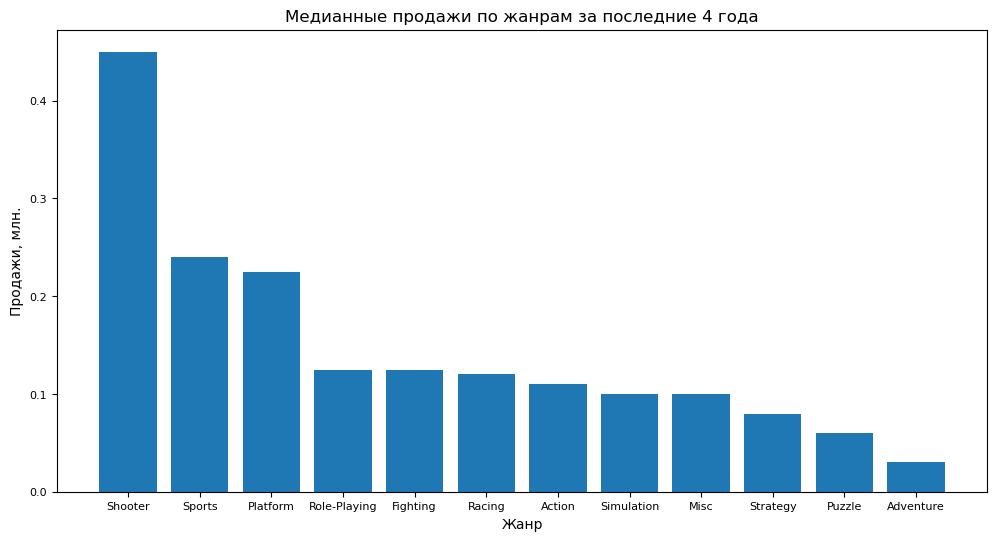

In [34]:
# Построим график распределения по жанрам для наглядности
plt.figure(figsize=(12, 6))
plt.bar(genre_median_sales.index, genre_median_sales['total_sales'])
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн.')
plt.title('Медианные продажи по жанрам за последние 4 года')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Наиболее стабильным по общим продажам жанром с серьезным отрывом от остальных является `Shooter`. Его можно считать наиболее прибыльным жанром. Популярными жанрами также являются `Sports` и `Platform`. Жанры `Puzzle` и `Adventure` имеют наименьшие продажи, свидетельствующие об их меньшей популярности среди игроков.

## Портрет пользователя

Составим портрет пользователя для каждого региона. Для этого определим для пользователя каждого региона:
- самые популярные платформы (топ-5).
- самые популярные жанры (топ-5).
- влияние рейтинга ESRB на продажи.

Круговые диаграммы хорошо подходят для представления долей в наборе данных.

### Самые популярные платформы по регионам

Перед построением диаграммы создадим переменные по каждому региону сгруппировав по платформам. Отсортируем полученную таблицу по убыванию количества продаж и выделим топ-5 платформ, остальные платформы объединим в `other`.

In [35]:
# Северная Америка
top_platform_na = df_filtered.groupby('platform')['na_sales'].agg('sum').sort_values(ascending=False)
top_5_platform_na = top_platform_na[:5]
top_5_platform_na = pd.concat([top_5_platform_na,
                              pd.Series([top_platform_na[~top_platform_na.index.isin(top_5_platform_na.index)].sum()], 
                                        index=['Other'])]).sort_values(ascending=False)
# Европа
top_platform_eu = df_filtered.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending=False)
top_5_platform_eu = top_platform_eu[:5]
top_5_platform_eu = pd.concat([top_5_platform_eu,
                              pd.Series([top_platform_eu[~top_platform_eu.index.isin(top_5_platform_eu.index)].sum()], 
                                        index=['Other'])]).sort_values(ascending=False)

# Япония
top_platform_jp = df_filtered.groupby('platform')['jp_sales'].agg('sum').sort_values(ascending=False)
top_5_platform_jp = top_platform_jp[:5]
top_5_platform_jp = pd.concat([top_5_platform_jp,
                              pd.Series([top_platform_jp[~top_platform_jp.index.isin(top_5_platform_jp.index)].sum()], 
                                        index=['Other'])]).sort_values(ascending=False)

Построим круговые диаграммы в один ряд для наглядности и удобства в сравнении.

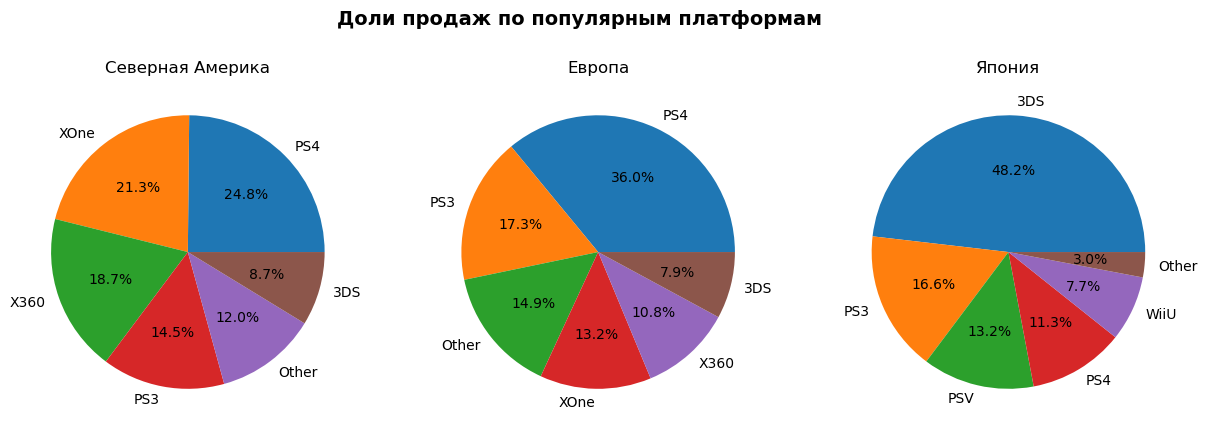

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].pie(top_5_platform_na, labels=top_5_platform_na.index, autopct='%1.1f%%')
axes[0].set_title('Северная Америка')

axes[1].pie(top_5_platform_eu, labels=top_5_platform_eu.index, autopct='%1.1f%%')
axes[1].set_title('Европа')

axes[2].pie(top_5_platform_jp, labels=top_5_platform_jp.index, autopct='%1.1f%%')
axes[2].set_title('Япония')

fig.suptitle('Доли продаж по популярным платформам', fontsize=14, fontweight='bold')
plt.show()

В Северной Америке самой популярной платформой является PS4 (24,8 % от всех продаж). За ней идут XOne (21,3 %) и X360 (18,7 %).

В Европе уверенно лидирует PS4 (36 %). Второй платформой по популярности является PS3 (17,3 %), но ее продажи уже значительно меньше чем у PS4. Северная Америка и Европа имеют схожие предпочтения в выборе платформ, с небольшим преимуществом PS4 в Европе и XOne в Северной Америке.

В Японии ситуация отличается. 3DS является самой популярной платформой и покрывает почти половину от всех продаж (48,2 %). Следом идут PS3 (16,6 %), PSV (13,2 %) и PS4 (11.3 %).

### Самые популярные жанры по регионам

То же самое сделаем для определения самых популярных жанров в каждом регионе.

In [37]:
# Создадим переменные по каждому региону

# Северная Америка
top_genre_na = df_filtered.groupby('genre')['na_sales'].agg('sum').sort_values(ascending=False)
top_5_genre_na = top_genre_na[:5]
top_5_genre_na = pd.concat([top_5_genre_na,
                            pd.Series([top_genre_na[~top_genre_na.index.isin(top_5_genre_na.index)].sum()], 
                                       index=['Other'])]).sort_values(ascending=False)
# Европа
top_genre_eu = df_filtered.groupby('genre')['eu_sales'].agg('sum').sort_values(ascending=False)
top_5_genre_eu = top_genre_eu[:5]
top_5_genre_eu = pd.concat([top_5_genre_eu,
                            pd.Series([top_genre_eu[~top_genre_eu.index.isin(top_5_genre_eu.index)].sum()], 
                                       index=['Other'])]).sort_values(ascending=False)

# Япония
top_genre_jp = df_filtered.groupby('genre')['jp_sales'].agg('sum').sort_values(ascending=False)
top_5_genre_jp = top_genre_jp[:5]
top_5_genre_jp = pd.concat([top_5_genre_jp,
                            pd.Series([top_genre_jp[~top_genre_jp.index.isin(top_5_genre_jp.index)].sum()], 
                                       index=['Other'])]).sort_values(ascending=False)

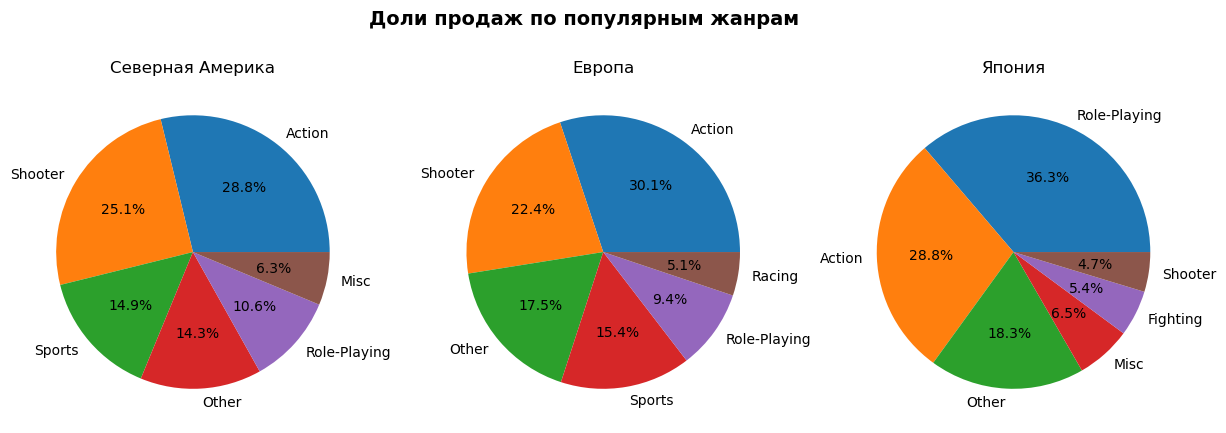

In [38]:
# Построение круговых диаграмм
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].pie(top_5_genre_na, labels=top_5_genre_na.index, autopct='%1.1f%%')
axes[0].set_title('Северная Америка')

axes[1].pie(top_5_genre_eu, labels=top_5_genre_eu.index, autopct='%1.1f%%')
axes[1].set_title('Европа')

axes[2].pie(top_5_genre_jp, labels=top_5_genre_jp.index, autopct='%1.1f%%')
axes[2].set_title('Япония')

fig.suptitle('Доли продаж по популярным жанрам',  fontsize=14, fontweight='bold')
plt.show()

В Северной Америке самыми популярными жанрами являются Action (28,8 %) и Shooter (25,1 %). Топ-3 закрывает жанр Sport (14,9 %).
В Европе, как и в Северной Америке, первые два места занимают Action (30,1 %) и Shooter (22,4 %), а третье место - другие платформы.
В Японии большинство пользователей предпочитают играть в Role-playing (36,3 %) и Action (28,8 %).

### Влияние рейтинга ESRB на продажи в отдельном регионе

Для начала разберемся с рейтингами от ESRB:
- E (Everyone) - Для всех.
- E10+ (Everyone 10 and older) - Для всех от 10 лет и старше.
- T (Teen) - Подросткам.
- M (Mature) - Для взрослых.

In [39]:
# Для каждого региона посчитаем количество продаж в зависимости от рейтинга ESRB и отсортируем по убыванию продаж.
sales_by_rating_na = df_filtered.groupby('rating')['na_sales'].agg('sum').sort_values(ascending=False)

sales_by_rating_eu = df_filtered.groupby('rating')['eu_sales'].agg('sum').sort_values(ascending=False)

sales_by_rating_jp = df_filtered.groupby('rating')['jp_sales'].agg('sum').sort_values(ascending=False)

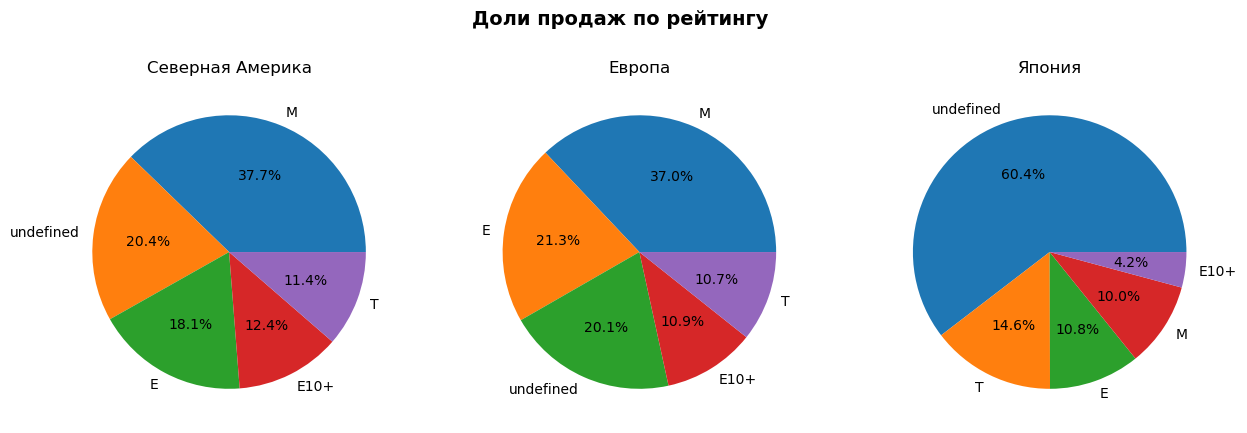

In [40]:
# Построим круговые диаграммы для каждого региона
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].pie(sales_by_rating_na, labels=sales_by_rating_na.index, autopct='%1.1f%%')
axes[0].set_title('Северная Америка')

axes[1].pie(sales_by_rating_eu, labels=sales_by_rating_eu.index, autopct='%1.1f%%')
axes[1].set_title('Европа')

axes[2].pie(sales_by_rating_jp, labels=sales_by_rating_jp.index, autopct='%1.1f%%')
axes[2].set_title('Япония')

fig.suptitle('Доли продаж по рейтингу',  fontsize=14, fontweight='bold')
plt.show()

В зависимости от рейтинга игры продажи различаются.
В Северной Америке и Европе лидируют игры с рейтингом "M". Категории "E" и "E10+" также имеют неплохие продажи.
Есть значительное количество продаж в категории с неопределенным рейтингом.
В Японии у большинства игр не определен рейтинг.

Для планирования кампании на следующий год необходимо учитывать различия между регионами. Понимание таких различий помогает адаптироваться к предпочтениям аудитории, что может увеличить шансы на успешность игры.

**Предпочтения по платформам**

Самой популярной платформой в Северной Америке и Европе является `PS4` (24,8% и 36% от общей продажи соответственно). В топ-5 в обе эти страны попали одни и те же платформы, но различие между регионами в том, что в общей картине в Европе больше предпочитают `Playstation`, а в Северной Америке `Xbox` имеет большую аудиторию. В Японии ситуация отличается. `3DS` является самой популярной платформой и покрывает почти половину от всех продаж (48,2 %), что говорит о предпочтениях к портативным консолям в этой стране, таким как `Nintendo 3DS`, `PSV` и `WiiU`.

**Предпочтения по жанрам**

В Северной Америке самыми популярными жанрами являются `Action` (28,8 %) и `Shooter` (25,1 %). Топ-3 закрывает жанр `Sport` (14,9 %).В Европе, как и в Северной Америке, первые два места занимают `Action` (30,1 %) и `Shooter` (22,4 %), а третье место - другие платформы. В целом, в Северной Америке и Европе предпочтения схожи. Единственное различие — в рейтинг Северной Америки попал жанр `Misc`, а в рейтинг Европы - `Racing`. 

Жанр игры `Role-playing` не попал в топ-5 Северной Америки и Европы, но является самым популярным в Японии (36,3 %). Жанр `Shooter` занимает всего пятое место и составляет 4,7% от общих продаж.

**Влияние рейтинга ESRB**

В Северной Америке и Европе влияние ESRB на продажи практически одинаково. Наибольшие продажи у игр с рейтингом `M` и `E`. Также существуют игры с существенными продажами, но отсутствующим указанием рейтинга. В Японии же рейтинг ESRB имеет меньшее значение, и большая часть продаж связана с играми, у которых рейтинг не определен (60,4%).

## Общий вывод

В рамках проведенного исследования был выполнен анализ данных о продажах компьютерных игр с целью выявления закономерностей и факторов, влияющих на успешность игры.

- Пик игровой индустрии пришелся на конец 2000-х и начало 2010-х. После этого наблюдается небольшой спад, но количество выпущенных игр остается всё равно высоким. В среднем срок жизни платформы - 8 лет.
- Для прогнозирования на 2017 год был выбран актуальный период, начиная с 2013 года, так как данные за этот период наиболее репрезентативны и позволяют учесть современные тенденции развития игровой индустрии.
- На основе анализа продаж игр за актуальный период были выявлены потенциально прибыльные платформы на 2017 год, включая `PS4`, `XOne`, `PC` и `3DS`. `PS3` и `X360` имели хорошие продажи в общем за 4 года, но не попали в список, потому что в последние годы продажи значительно сократились из-за выпуска новых поколений консолей.
- При построении "ящика с усами" можно увидеть выбивающиеся от остальных игры, что говорит о наличии крупных хитов, которые продаются в огромных количествах.
- Для всех четырех платформ оценки пользователей практически не коррелируют с продажами. Это может означать, что мнение пользователей не так сильно влияет на успешность игр на рассматриваемых платформах. Корреляция между отзывами критиков и продажами игр обычно слаба, но положительная. Это означает, что в целом, игры с более высокими оценками критиков имеют склонность к более высоким продажам.
- Самые популярные жанры за 4 года - `Action`, `Shooter`, `Sports`, `Role-playing`.
- Для каждого региона были сформированы портреты типичных пользователей с учетом предпочтений по жанрам, платформам и рейтингу ESRB:
    - Предпочтения в Северной Америке и Европе схожи. Игроки предпочитают играть на консолях, особенно PlayStation и Xbox. Предпочитаемые жанры - Action и Shooter. Игроки более склонны к играм с рейтингом "М".
    - Игроки в Японии предпочитают играть на портативных консолях, таких как Nintendo 3DS и Playstation Vita. При этом PS3 и PS4 также имеют популярность, но меньше чем первые. Чаще всего играют в Role-playing и Action. В Японии рейтинг ESRB имеет меньшее значение, и большая часть продаж связана с играми, у которых рейтинг не определен.